# Police shootings

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('./data/PoliceBrutality/police_shootings.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,6529,Christopher Harris,2021-01-18,shot,gun,27.0,M,NaN,Toledo,OH,True,attack,Foot,False,-83.550,41.664,True
5977,6531,Kevin Darion Wells,2021-01-18,shot,gun,56.0,M,W,St. Clair County,AL,False,attack,Not fleeing,False,-86.331,33.475,True
5978,6530,NaN,2021-01-19,shot,gun,NaN,M,NaN,Greeley,CO,False,other,Other,False,-104.716,40.385,True
5979,6532,Bull Robert Laudell,2021-01-19,shot,gun,55.0,M,NaN,Perryville,AR,False,attack,Not fleeing,False,-92.875,34.975,True


* First, replace the name of the races so readers will understand better.
* For this analysis, Asian, Native and other races are put into one for easier calculation.

In [26]:
df.race.replace(to_replace='W', value='White', inplace=True)
df.race.replace(to_replace='B', value='Black', inplace=True)
df.race.replace(to_replace='H', value='Hispanic', inplace=True)
df.race.replace(to_replace='A', value='Others', inplace=True)
df.race.replace(to_replace='N', value='Others', inplace=True)
df.race.replace(to_replace='O', value='Others', inplace=True)
df.race.value_counts()

White       2738
Black       1425
Hispanic    1002
Others       225
Name: race, dtype: int64

# The number of shootings in each races from 2015 to 2021

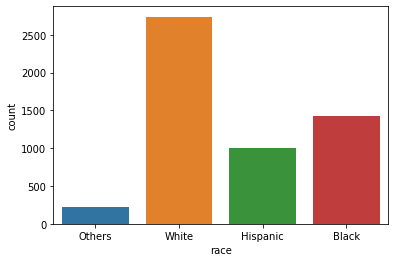

In [8]:
sb.countplot(data=df, x='race');

# The rate of shootings in each races
* the population of each races were taken from the web as it will be used to calculate the rate of shootings later.

In [34]:
Bpop = 42*(10**6)
Hpop = 39*(10**6)
Wpop = 197*(10**6)
Opop = 49*(10**6)

race_populations = [Wpop, Bpop, Hpop, Opop]
race = list(df.race.value_counts().index)
for i in range(len(race)):
    print(f'The population for {race[i]} is {race_populations[i]}')


The population for White is 197000000
The population for Black is 42000000
The population for Hispanic is 39000000
The population for Others is 49000000


* finding rate using (number of shootings in each race)/(population of each race)

In [37]:
race_shootings = list(df.race.value_counts())
rate_shootings = []
for i in range(len(race)):
    if i<4:
        rate_shootings.append(race_shootings[i]/race_populations[i])       
    if i==4:
        rate_shootings.append((race_shootings[i]+race_shootings[i+1]+race_shootings[i+2])/race_populations[i])


* visualize the data using countplot to create a histogram
* it is clear that the rate of shootings for Black race is higher than the other races

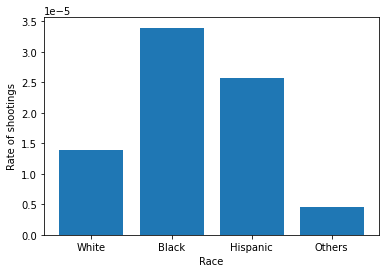

In [9]:
race = list(df.race.value_counts().index)
plt.bar(race, rate_shootings);
plt.xlabel('Race');
plt.ylabel('Rate of shootings');


# The range age of the victims
* There is a high number of victims in the age range of 25 to 40

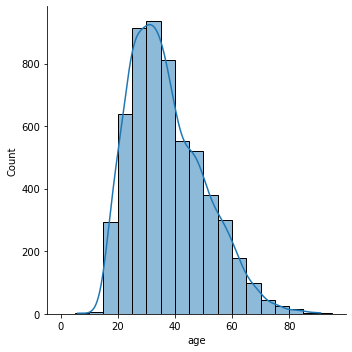

In [10]:
bins = np.arange(0,df.age.max()+5,5)
sb.displot(df.age, kde=True, bins=bins);

# Top 10 states with the highest number of victims

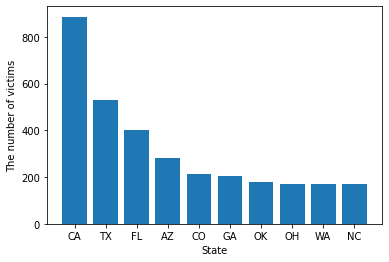

In [38]:
top10states = list(df.state.value_counts()[:10])
states = list(df.state.value_counts()[:10].index)
plt.bar(states, top10states);
plt.xlabel('State');
plt.ylabel('The number of victims');

# Signs of mental illness in each race
* The percentage of white people with sign of mental illness is higher than that of other races

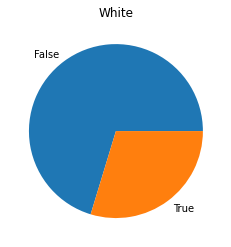

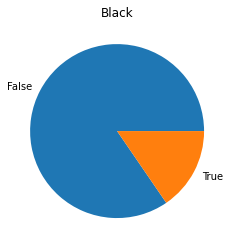

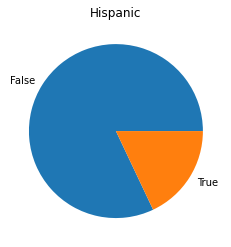

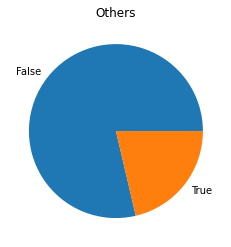

In [14]:
mental_illness = []
labels = df.signs_of_mental_illness.value_counts().index

for r in race:
    mental_illness.append(df.signs_of_mental_illness[df.race==r].value_counts())
for i in range(len(race)):
    plt.pie(mental_illness[i], labels=labels);
    plt.title(race[i]);
    plt.show()
    


# Top 5 items used as a possible weapon by the victims
* The number of unarmed Black victims is higher than the other races

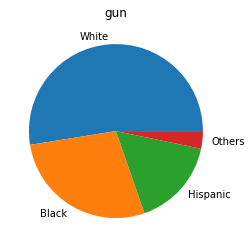

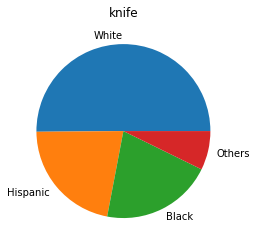

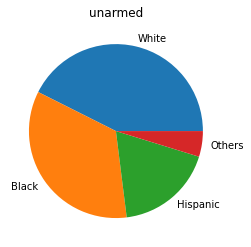

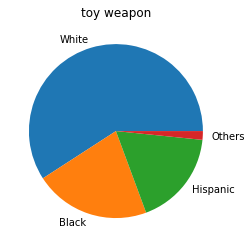

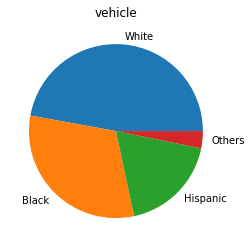

In [15]:
armed = list(df.armed.value_counts()[:5].index)
for a in armed:
    plt.pie(df.race[df.armed==a].value_counts(), labels= df.race[df.armed==a].value_counts().index)
    plt.title(a)
    plt.show();

# How the victims' flee in each races
* most victims did not flee

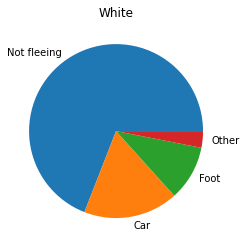

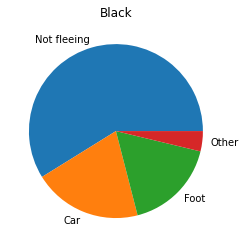

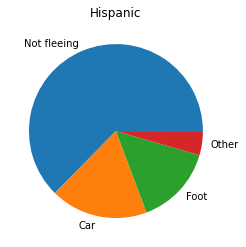

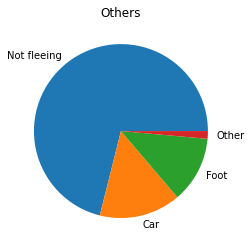

In [16]:
flee = list(df.flee.value_counts().index)
for r in race:
    plt.pie(df.flee[df.race==r].value_counts(), labels=flee);
    plt.title(r)
    plt.show();

# The number of police officers wearing a body camera
* Most police officers did not use a body camera

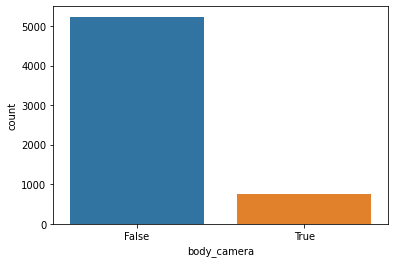

In [17]:
sb.countplot(data=df, x='body_camera');

# The manner of death in each race


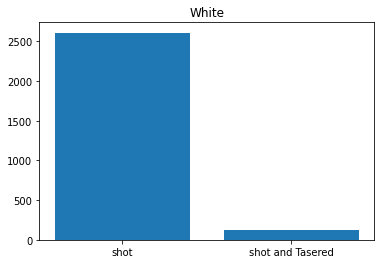

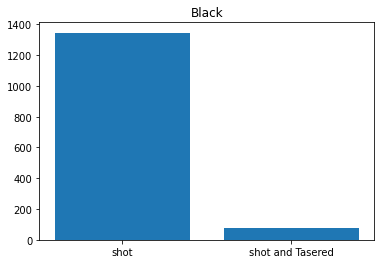

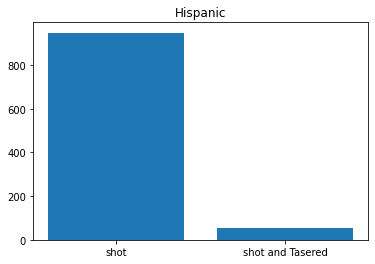

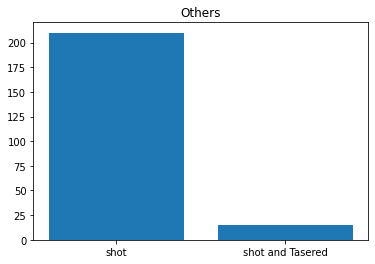

In [18]:
for r in race:
    plt.bar(df.manner_of_death.value_counts().index,df.manner_of_death[df.race==r].value_counts());
    plt.title(r);
    plt.show();   

# The trend of police shootings from 2015 to 2020
* It is shown that the rate of police shootings is increasing over the years

In [40]:
from datetime import datetime
def convert(date_str):
    date_obj = datetime.strptime(date_str , '%Y-%m-%d')
    return date_obj
date = list(df.date)
for d in date:
    d_obj = convert(d)
    df.date.replace(to_replace=d , value=d_obj.year , inplace=True) 

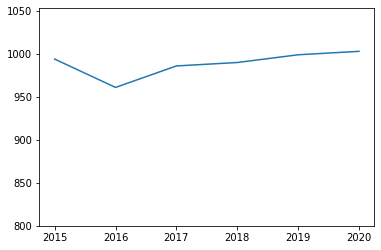

In [41]:
x = df.date.value_counts().index[:6]
y = df.date.value_counts()[:6].sort_index(ascending=False)
plt.plot(y);
plt.ylim(800,y.max()+50);